In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

# Paso 2: Entendimiento de los Datos

## Entendiemiento del Dataset de Calificaciones de estudiantes

### Exploración Inicial de los Datos

En esta fase, nos enfocamos en explorar los datos disponibles para comprender su estructura, contenido y calidad. El dataset que hemos obtenido contiene las siguientes columnas:

- **Sede**: Valor categórico que representa el nombre de la sede del colegio.
- **Estudiante**: Nombre completo del estudiante.
- **Documento de identidad**: Número de documento de identidad del estudiante.
- **Grado**: Nivel de escolaridad del estudiante (por ejemplo, 1º, 2º, 3º, etc.).
- **Grupo**: Identificador del grupo al que pertenece el estudiante dentro de su grado.
- **Periodo**: Periodo académico en el que se registraron las calificaciones.
- **Año**: Año en el que se registraron los datos.
- **Intensidad Horaria**: Número de horas dedicadas a la asignatura.
- **Asignatura**: Nombre de la asignatura que está siendo evaluada.
- **Cognitiva**: Calificación obtenida por el estudiante en la dimensión cognitiva.
- **Procedimental**: Calificación obtenida por el estudiante en la dimensión procedimental.
- **Actitudinal**: Calificación obtenida por el estudiante en la dimensión actitudinal.
- **Axiológica**: Calificación obtenida por el estudiante en la dimensión axiológica.

A continuación, procederemos a explorar estos datos en detalle para entender mejor su estructura y evaluar su calidad.

### Análisis Exploratorio de los Datos

- Cargar el archivo Excel

In [254]:

# Cargar el archivo Excel
url = 'C:/Users/Cathe/Documents/MAA/TERCER SEMESTRE/ELECTIVA I - AD/DATA FORMAR INNOVAR/Calificaciones-2023-2024.csv'
calificaciones_df = pd.read_csv(url)
calificaciones_df.head()


,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN


- Exploramos la estructura del DataFrame (nombre de columnas, tipos de datos y valores nulos)

In [255]:
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24944 entries, 0 to 24943
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    24944 non-null  object 
 1   Estudiante              24944 non-null  object 
 2   Documento de identidad  24944 non-null  object 
 3   Grado                   24944 non-null  object 
 4   Grupo                   24944 non-null  object 
 5   Periodo                 24944 non-null  object 
 6   Año                     24944 non-null  int64  
 7   Intensidad Horaria      22045 non-null  float64
 8   Asignatura              24944 non-null  object 
 9   Cognitiva               24944 non-null  int64  
 10  Procedimental           24944 non-null  int64  
 11  Actitudinal             24944 non-null  int64  
 12  Axiologica              22045 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.5+ MB


- Se verifica la cantidad de valores null

In [256]:
#se verifica la cantidad de valores null
calificaciones_df.isnull().sum()

Sede                         0
Estudiante                   0
Documento de identidad       0
Grado                        0
Grupo                        0
Periodo                      0
Año                          0
Intensidad Horaria        2899
Asignatura                   0
Cognitiva                    0
Procedimental                0
Actitudinal                  0
Axiologica                2899
dtype: int64

### Conversiones a Realizar
- **Columna `Estudiante` y `Documento de identidad`**: Convertida a tipo object y aplicado un hash para anonimizar.
-
- **Valores nulos en columnas `Intensidad Horaria` y `Axiologica`**: se reemplaza null por 'NA' ya que estos datos estan fantantes en los grados de preescolar


- Copiar df original para realizar las transformaciones iniciales de los datos

In [257]:
calificaciones_df_trans = calificaciones_df.copy()

# Función para aplicar hash a un valor
def hash_value(value):
    return hashlib.sha256(value.encode()).hexdigest()


- Se elimina filas de grados de preescolar ya que no poseen todas las calificaciones en todas las dimensiones ni tienen intesidad horaria

In [258]:
calificaciones_df_trans.loc[calificaciones_df_trans['Intensidad Horaria'].isnull()]

,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24774,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Lectoescritura,98,90,95,NaN
24775,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Inglés,98,90,95,NaN
24776,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Aprendizaje Basado en Retos,96,96,96,NaN
24777,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Educación Física,95,95,95,NaN


#### - se detecta que los valores nulos solo se encuentran en los registros de preescolar 

In [259]:
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Párvulos'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grupo'] == 'Prejardín'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Jardín'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Transición'].index, inplace=True)

- Cambiar columna Estudiante y Documento de identidad con valores hash

In [260]:
#calificaciones_df_trans['Estudiante'] = calificaciones_df_trans['Estudiante'].apply(hash_value)
calificaciones_df_trans['Documento de identidad'] = calificaciones_df_trans['Documento de identidad'].apply(hash_value)

- Eliminar columnas con datos sensibles

In [261]:
calificaciones_df_trans.drop(columns=['Estudiante'], inplace=True)

In [291]:
calificaciones_df_trans

,Sede,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada,Grupo Asignatura
16,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Ciencias Naturales,75,75,80,85.0,77.0,Ciencias y Matemáticas
17,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,4.0,Ciencias Sociales,86,88,93,92.0,88.6,Lengua y Humanidades
18,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,6.0,Matemáticas,87,89,85,90.0,87.5,Ciencias y Matemáticas
19,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Lengua Castellana,79,87,90,90.0,84.7,Lengua y Humanidades
20,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,4.0,Inglés,94,94,92,93.0,93.5,Lengua y Humanidades
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24939,Girardot,1f390d3861bd10bbdc9775bc6ee732b5969122e36f59fb...,7,A,IV,2023,3.0,Educación Física,88,86,90,88.0,87.8,Artes y Educación Física
24940,Girardot,1f390d3861bd10bbdc9775bc6ee732b5969122e36f59fb...,7,A,IV,2023,2.0,Lectura Crítica,78,78,70,70.0,75.6,Lengua y Humanidades
24941,Girardot,1f390d3861bd10bbdc9775bc6ee732b5969122e36f59fb...,7,A,IV,2023,1.0,Artes,90,88,80,86.0,87.0,Artes y Educación Física
24942,Girardot,1f390d3861bd10bbdc9775bc6ee732b5969122e36f59fb...,7,A,IV,2023,1.0,Robótica y TICS,72,71,80,90.0,75.1,Tecnología e Innovación


- Cambiar columna Año por variable categorica

In [262]:
calificaciones_df_trans['Año'] = calificaciones_df_trans['Año'].astype('object')

- Se realiza imputacion de datos nulos de variables categoricas Intensidad Horaria y Axiologica con valor constante

In [263]:
#calificaciones_df_trans['Intensidad Horaria'].fillna(-1, inplace=True)
#calificaciones_df_trans['Axiologica'].fillna(-1, inplace=True)

## Listar clases de las variables categóricas

In [264]:
calificaciones_df_trans['Grado'].value_counts()

Grado
6     2881
3     2755
5     2545
4     2539
2     2419
7     2389
1     2225
8     1440
10    1311
9     1214
11     327
Name: count, dtype: int64

In [265]:
calificaciones_df_trans['Grupo'].value_counts()

Grupo
A    21157
B      888
Name: count, dtype: int64

In [266]:
calificaciones_df_trans['Periodo'].value_counts()

Periodo
I      7405
II     7383
III    3633
IV     3624
Name: count, dtype: int64

In [267]:
calificaciones_df_trans['Año'].value_counts()

Año
2023    14631
2024     7414
Name: count, dtype: int64

#### se verifica la cantidad de valores null nuevamente


In [268]:
calificaciones_df_trans.isnull().sum()

Sede                      0
Documento de identidad    0
Grado                     0
Grupo                     0
Periodo                   0
Año                       0
Intensidad Horaria        0
Asignatura                0
Cognitiva                 0
Procedimental             0
Actitudinal               0
Axiologica                0
dtype: int64

In [269]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22045 entries, 16 to 24943
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    22045 non-null  object 
 1   Documento de identidad  22045 non-null  object 
 2   Grado                   22045 non-null  object 
 3   Grupo                   22045 non-null  object 
 4   Periodo                 22045 non-null  object 
 5   Año                     22045 non-null  object 
 6   Intensidad Horaria      22045 non-null  float64
 7   Asignatura              22045 non-null  object 
 8   Cognitiva               22045 non-null  int64  
 9   Procedimental           22045 non-null  int64  
 10  Actitudinal             22045 non-null  int64  
 11  Axiologica              22045 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


#### Calcular la calificación ponderada total y almacenarla en una nueva columna


In [270]:
pesos = {
    'Cognitiva': 0.4,      #  peso del 40% para Cognitiva
    'Procedimental': 0.3,  #  peso del 30% para Procedimental
    'Actitudinal': 0.2,    #  peso del 20% para Actitudinal
    'Axiologica': 0.1      #  peso del 10% para Axiológica
}
calificaciones_df_trans['Calificacion_Ponderada'] = (
    calificaciones_df_trans['Cognitiva'] * pesos['Cognitiva'] +
    calificaciones_df_trans['Procedimental'] * pesos['Procedimental'] +
    calificaciones_df_trans['Actitudinal'] * pesos['Actitudinal'] +
    calificaciones_df_trans['Axiologica'] * pesos['Axiologica']
)

In [271]:
calificaciones_df_trans.head()

,Sede,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada
16,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Ciencias Naturales,75,75,80,85.0,77.0
17,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,4.0,Ciencias Sociales,86,88,93,92.0,88.6
18,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,6.0,Matemáticas,87,89,85,90.0,87.5
19,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Lengua Castellana,79,87,90,90.0,84.7
20,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,4.0,Inglés,94,94,92,93.0,93.5


In [272]:
calificaciones_df_trans['Grado'] = pd.to_numeric(calificaciones_df_trans['Grado'])

## 1. Analitica Descriptiva

In [273]:
def analitica_descriptiva(df,list_cols, filter):
    resultados = {}
    for col in list_cols:
        descriptivo = df.groupby(filter)[col].describe()
        resultados[col] = descriptivo
        print(f"______ Análisis descriptivo: {col} por {filter} ______")
        print(descriptivo)
        print("_______________________________________________________\n")
    return resultados

In [274]:
def graficos_analitica_descriptiva_v(calificaciones_df, list_cols, filter_col, rotacion):
    num_cols = len(list_cols)  
    plt.figure(figsize=(20, 5))  

    for i, col in enumerate(list_cols):
        plt.subplot(1, num_cols, i + 1)
        sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
        plt.title(f"{col}", fontsize=14)
        plt.xlabel(filter_col, fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=rotacion, fontsize=10)
        plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()


In [275]:
def graficos_analitica_descriptiva_h(calificaciones_df, list_cols, filter_col, rotacion):
    num_cols = len(list_cols)  
    plt.figure(figsize=(10, num_cols * 5)) 
    for i, col in enumerate(list_cols):
        plt.subplot(num_cols, 1, i + 1)  # Configura los subgráficos en 1 columna y num_cols filas
        sns.boxplot(y=filter_col, x=col, data=calificaciones_df, palette='Set2')
        plt.title(f"{col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel(filter_col, fontsize=12)
        plt.xticks(rotation=rotacion, fontsize=10)
        plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

In [276]:
columnas = ['Cognitiva','Procedimental','Actitudinal','Axiologica',"Calificacion_Ponderada"]
filtro = "Sede"
eda_sede = analitica_descriptiva(calificaciones_df_trans, columnas, filtro)

______ Análisis descriptivo: Cognitiva por Sede ______
              count       mean        std   min   25%   50%   75%    max
Sede                                                                    
Fusagasugá  14369.0  84.004524  11.191635   0.0  79.0  86.0  92.0  100.0
Girardot     7676.0  84.195414   8.680450  26.0  80.0  86.0  90.0  100.0
_______________________________________________________

______ Análisis descriptivo: Procedimental por Sede ______
              count       mean        std   min   25%   50%   75%    max
Sede                                                                    
Fusagasugá  14369.0  83.788990  11.607480   0.0  79.0  87.0  92.0  100.0
Girardot     7676.0  83.997004   8.855915  25.0  80.0  86.0  90.0  100.0
_______________________________________________________

______ Análisis descriptivo: Actitudinal por Sede ______
              count       mean        std  min   25%   50%   75%    max
Sede                                                       

In [277]:
filtro = "Grado"
eda_grado=analitica_descriptiva(calificaciones_df_trans, columnas, filtro)

______ Análisis descriptivo: Cognitiva por Grado ______
        count       mean        std   min   25%   50%   75%    max
Grado                                                             
1      2225.0  88.333933   8.820015  28.0  85.0  90.0  94.0  100.0
2      2419.0  84.888797  10.156857   0.0  80.0  87.0  92.0  100.0
3      2755.0  85.005082   8.897747  45.0  80.0  87.0  92.0  100.0
4      2539.0  84.367468   9.013827  43.0  79.0  86.0  91.0  100.0
5      2545.0  83.209823   9.476468   0.0  79.0  85.0  90.0  100.0
6      2881.0  84.192989   8.898593  36.0  80.0  85.0  90.0  100.0
7      2389.0  83.391377   8.952393  28.0  79.0  85.0  90.0  100.0
8      1440.0  81.840972  10.937201  22.0  76.0  84.0  90.0  100.0
9      1214.0  82.667216  12.344050   0.0  79.0  85.0  90.0  100.0
10     1311.0  80.194508  17.278266   0.0  76.0  84.0  90.0  100.0
11      327.0  80.009174  12.763898   0.0  75.0  81.0  89.0   99.0
_______________________________________________________

______ Análisis 

In [278]:
filtro = "Asignatura"
eda_asignatura=analitica_descriptiva(calificaciones_df_trans, columnas, filtro)

______ Análisis descriptivo: Cognitiva por Asignatura ______
                                        count       mean        std   min  \
Asignatura                                                                  
Aprendizaje Basado en Investigación     662.0  84.675227   9.174982   0.0   
Aprendizaje Basado en Proyectos        1043.0  88.150527   7.474292   0.0   
Artes                                  1829.0  88.693822   9.726752   0.0   
Ciencias Naturales                     1813.0  79.207391  10.312395  22.0   
Ciencias Políticas y Económicas          62.0  79.629032  15.161679   8.0   
Ciencias Sociales                      1756.0  82.770501   8.266450  43.0   
Creatividad e Innovación                726.0  87.431129   7.092887  36.0   
Creatividad e innovación                316.0  89.041139   5.622084  43.0   
Educación Ambiental                      62.0  78.790323  17.397133   0.0   
Educación Física                       1835.0  88.097548   8.266009   0.0   
English        

### Graficos de cajas por Sede, Grado y asignatura para cada Dimension

C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\661503986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\661503986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\661503986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local

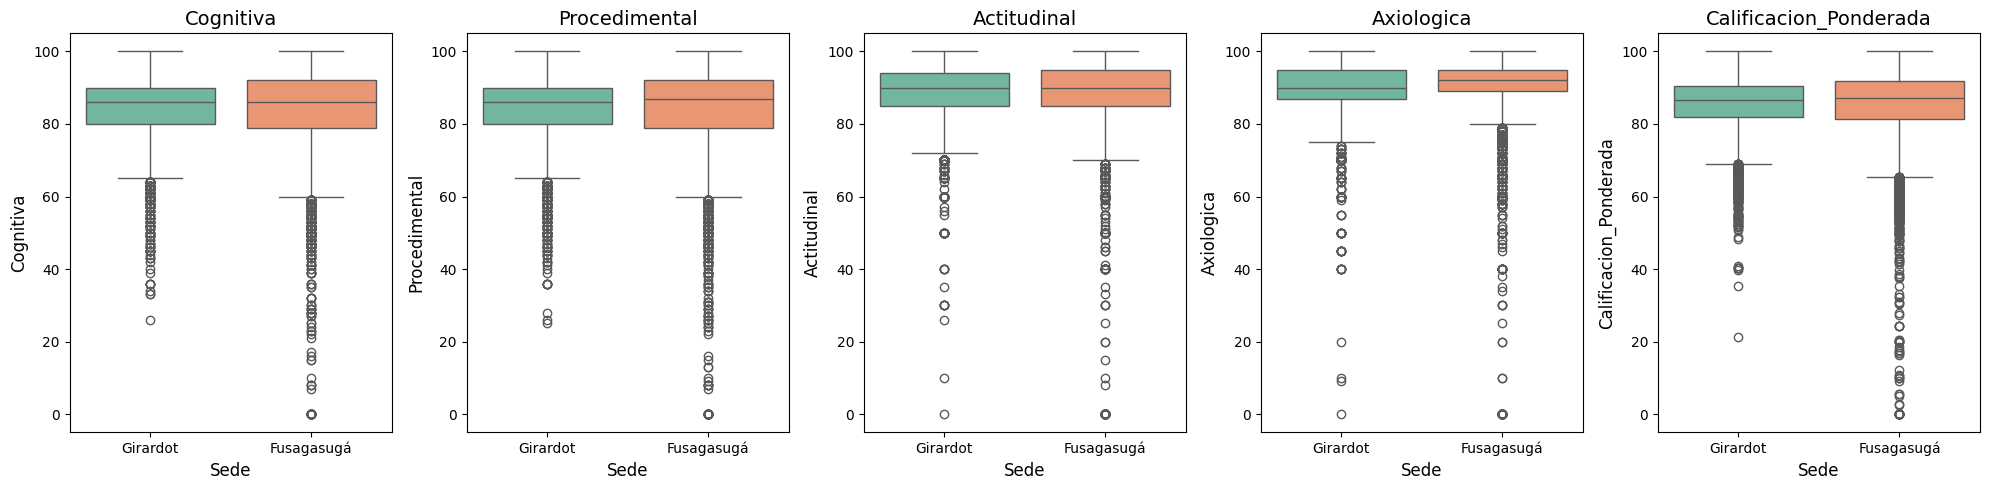

C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\661503986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\661503986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\661503986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filter_col, y=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local

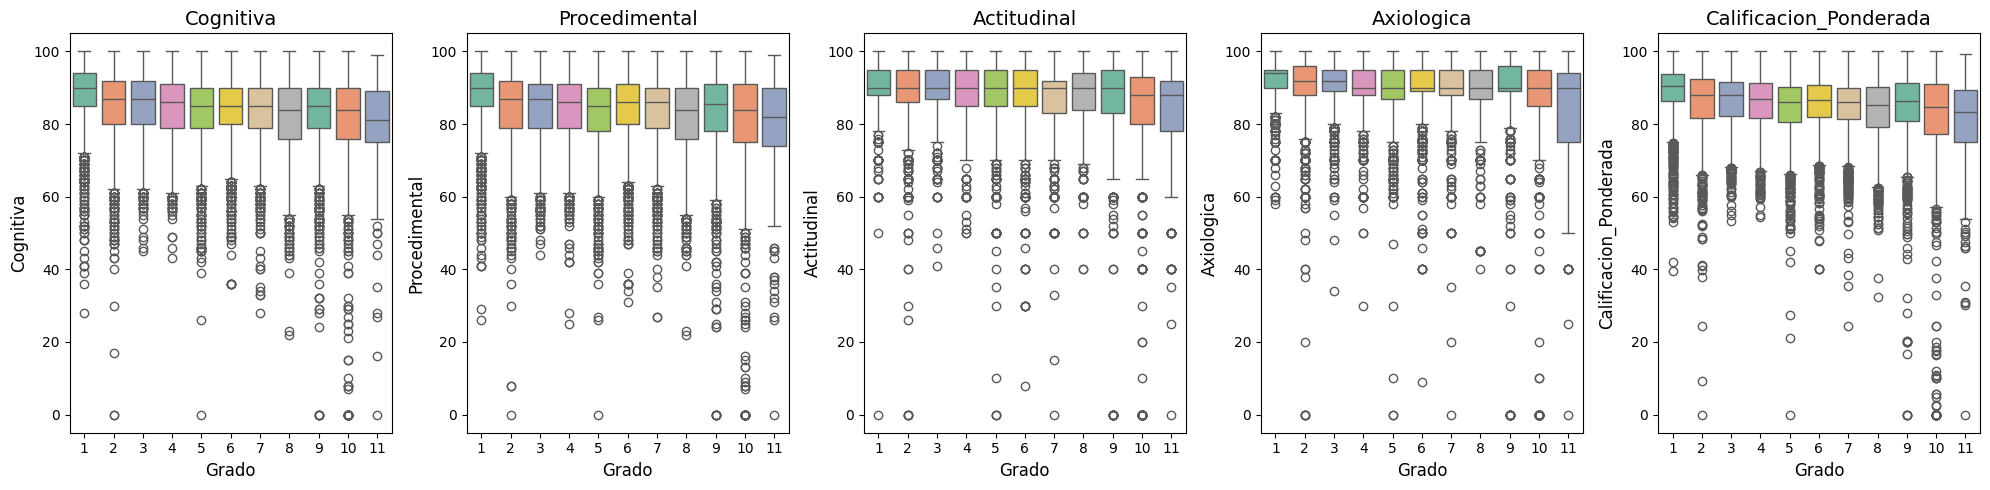

C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\3068165785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=filter_col, x=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\3068165785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=filter_col, x=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Local\Temp\ipykernel_21544\3068165785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=filter_col, x=col, data=calificaciones_df, palette='Set2')
C:\Users\Cathe\AppData\Lo

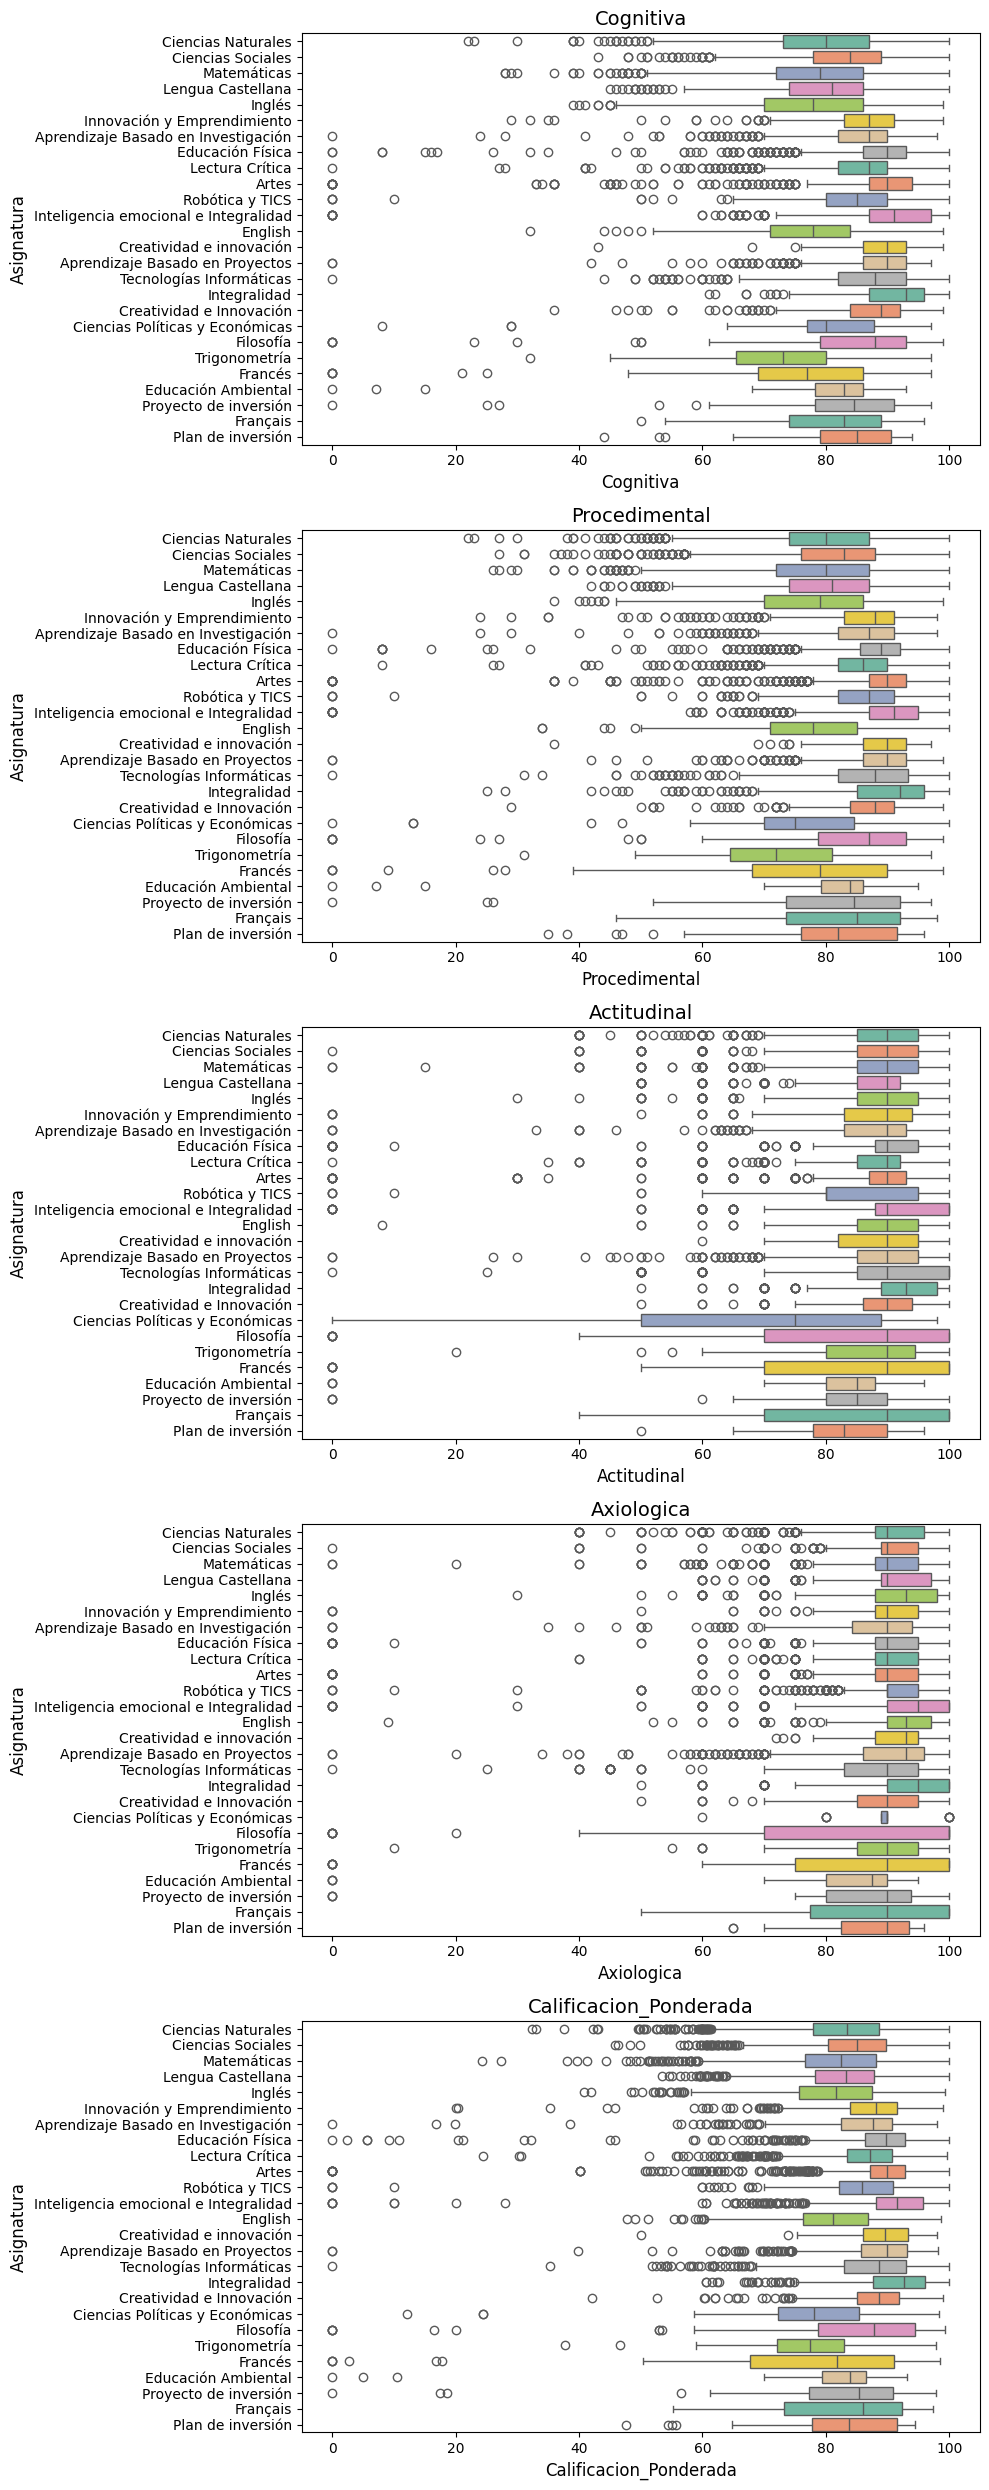

In [279]:
graficos_analitica_descriptiva_v(calificaciones_df_trans, columnas, 'Sede' , 0)
graficos_analitica_descriptiva_v(calificaciones_df_trans,columnas,'Grado', 0)
graficos_analitica_descriptiva_h(calificaciones_df_trans,columnas,'Asignatura', 0)

### Graficos de Barras por Sede, Grado y asignatura para cada Dimension

In [280]:

def graficos_barras_descriptiva(df, list_cols, filter_col):
    df_melted = df.melt(id_vars=[filter_col], value_vars=list_cols, var_name='Tipo de Calificación', value_name='Calificación')
    plt.figure(figsize=(10, 3))
    
    # Gráfico de barras agrupadas
    sns.barplot(x=filter_col, y='Calificación', hue='Tipo de Calificación', data=df_melted, palette='viridis')
    
    plt.title(f"Comparación de Calificaciones por {filter_col}")
    plt.xlabel(filter_col)
    plt.ylabel('Calificación')
    plt.legend(title='Tipo de Calificación')
    plt.tight_layout()
    plt.show()

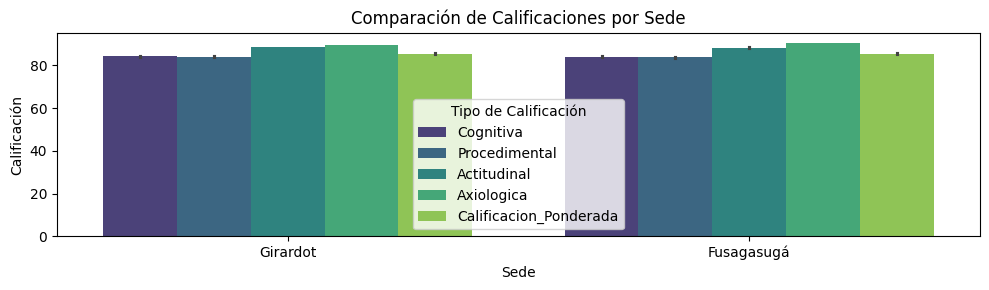

In [281]:
list_cols = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica','Calificacion_Ponderada']
filter_col = 'Sede'
graficos_barras_descriptiva(calificaciones_df_trans, list_cols, filter_col)

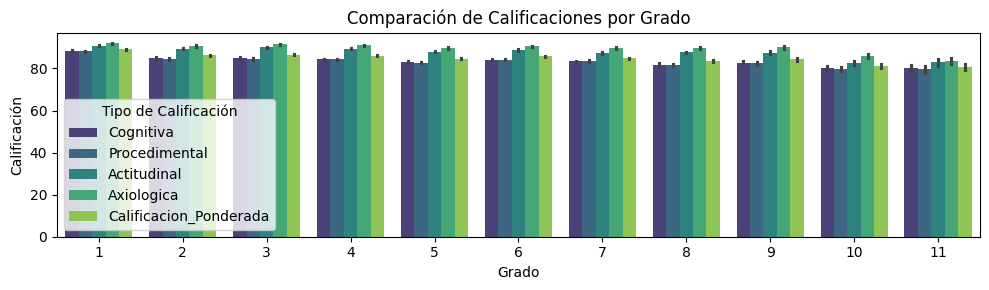

In [282]:
filter_col = 'Grado'
graficos_barras_descriptiva(calificaciones_df_trans, list_cols, filter_col)

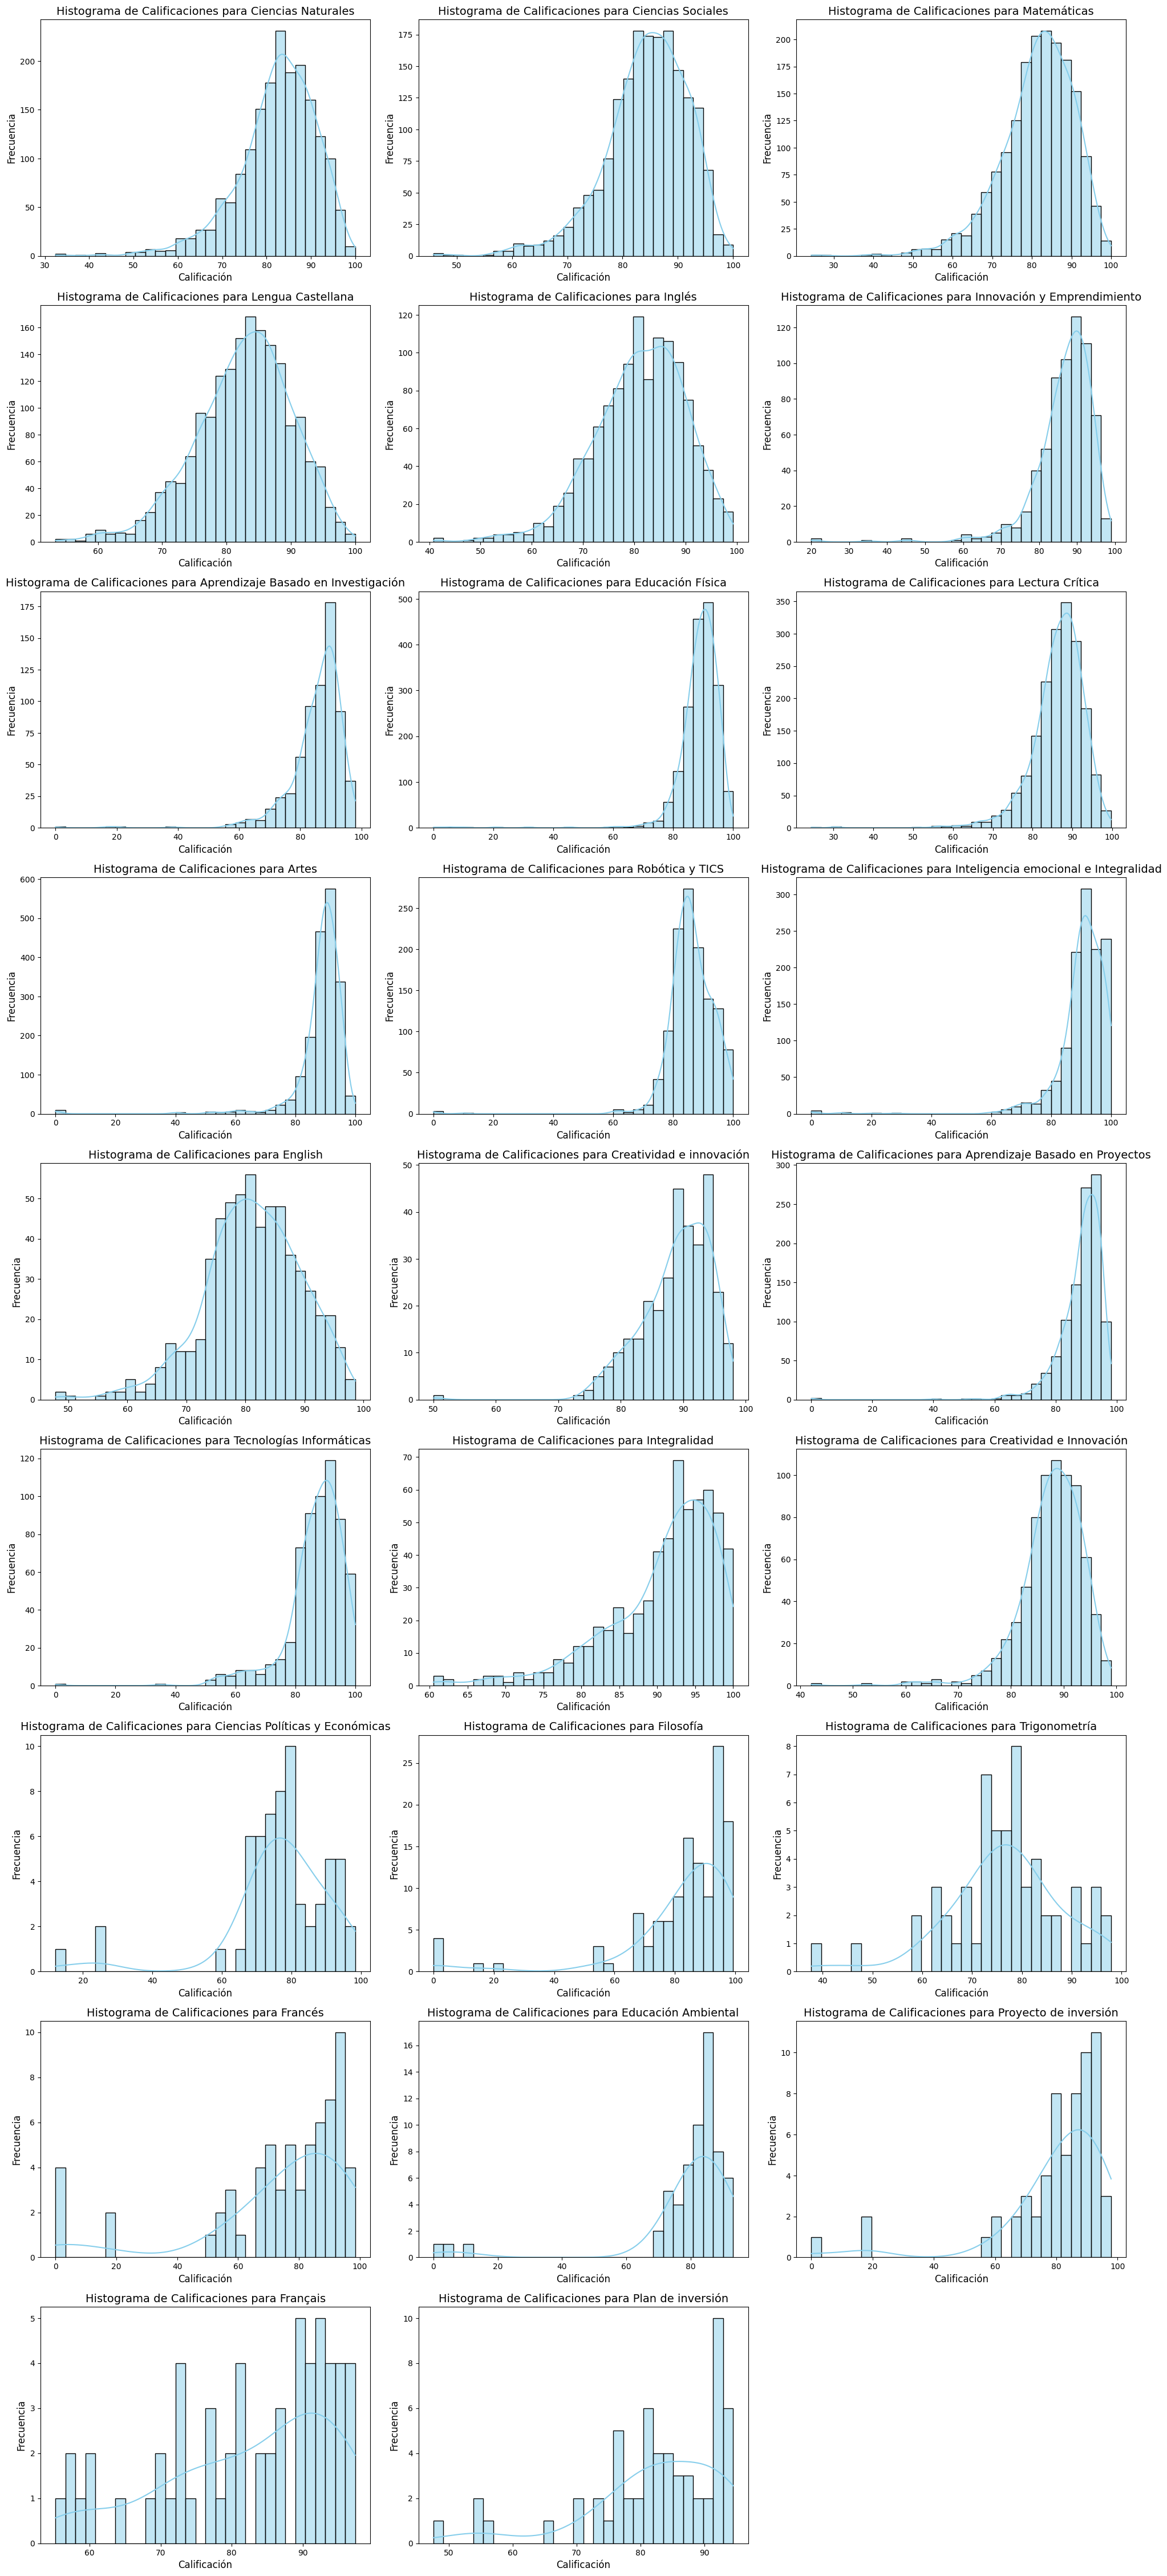

In [283]:
def graficos_histograma_por_asignatura(calificaciones_df, asignaturas_col, calificaciones_col):
    asignaturas = calificaciones_df[asignaturas_col].unique()  # Lista de asignaturas
    num_asignaturas = len(asignaturas)
    plt.figure(figsize=(20, num_asignaturas * 5))  
    for i, asignatura in enumerate(asignaturas):
        plt.subplot(num_asignaturas, 3, i + 1)
        data_asignatura = calificaciones_df[calificaciones_df[asignaturas_col] == asignatura]
        sns.histplot(data=data_asignatura, x=calificaciones_col, bins=30, kde=True, color='skyblue')
        plt.title(f"Histograma de Calificaciones para {asignatura}", fontsize=14)
        plt.xlabel('Calificación', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)       
    plt.tight_layout()
    plt.show()

graficos_histograma_por_asignatura(calificaciones_df_trans, 'Asignatura', 'Calificacion_Ponderada')


## 2. Analitica Inferencial

In [284]:
from scipy.stats import ttest_ind

def analitica_inferencial(df, list_cols, filter_col, group1, group2):
    
    for col in list_cols:
        # Filtrar los datos para los dos grupos
        data_group1 = df[df[filter_col] == group1][col]
        data_group2 = df[df[filter_col] == group2][col]
        
        # Realizar la prueba t
        t_stat, p_value = ttest_ind(data_group1, data_group2)
        
        # Mostrar resultados
        print(f"______ Análisis inferencial: {col} entre {group1} y {group2} _____")
        print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
        if p_value < 0.05:
            print("Resultado: Diferencia significativa.")
        else:
            print("Resultado: No hay diferencia significativa.")
        print("_______________________________________________________\n")



In [285]:
filtro = "Sede"
group1 = 'Fusagasugá'
group2 = 'Girardot'
analitica_inferencial(calificaciones_df_trans, columnas, filtro, group1, group2)


______ Análisis inferencial: Cognitiva entre Fusagasugá y Girardot _____
T-Statistic: -1.3000047518015792, P-Value: 0.193612933762809
Resultado: No hay diferencia significativa.
_______________________________________________________

______ Análisis inferencial: Procedimental entre Fusagasugá y Girardot _____
T-Statistic: -1.3712776878175794, P-Value: 0.17030236751640784
Resultado: No hay diferencia significativa.
_______________________________________________________

______ Análisis inferencial: Actitudinal entre Fusagasugá y Girardot _____
T-Statistic: -1.9494246623418896, P-Value: 0.05125739571476339
Resultado: No hay diferencia significativa.
_______________________________________________________

______ Análisis inferencial: Axiologica entre Fusagasugá y Girardot _____
T-Statistic: 7.47547454770888, P-Value: 7.979453174045993e-14
Resultado: Diferencia significativa.
_______________________________________________________

______ Análisis inferencial: Calificacion_Ponderada ent

### Matriz de correlación

Matriz de Correlación incluyendo Intensidad Horaria:
               Cognitiva  Procedimental  Actitudinal  Axiologica
Cognitiva       1.000000       0.937983     0.563774    0.489732
Procedimental   0.937983       1.000000     0.581710    0.490943
Actitudinal     0.563774       0.581710     1.000000    0.753637
Axiologica      0.489732       0.490943     0.753637    1.000000


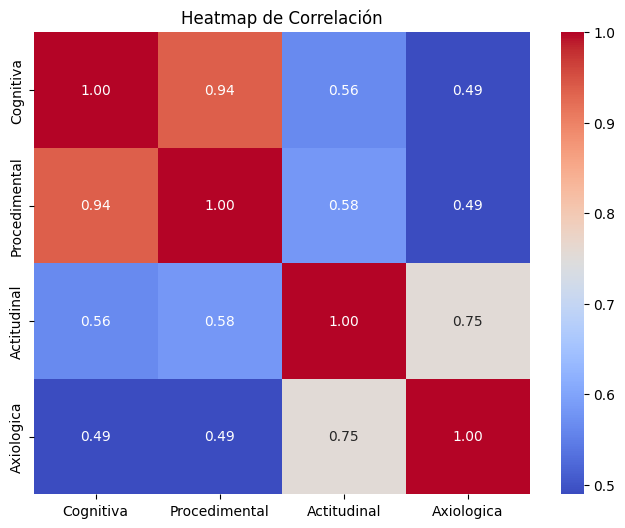

In [286]:
columns_of_interest = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica']

# Calcular la matriz de correlación
correlacion_con_intensidad = calificaciones_df_trans[columns_of_interest].corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación incluyendo Intensidad Horaria:")
print(correlacion_con_intensidad)

# Visualización de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlacion_con_intensidad, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación')
plt.show()

- Cognitiva y Procedimental (0.94): Existe una correlación muy alta entre las calificaciones Cognitivas y Procedimentales. Esto indica que los estudiantes que obtienen buenas calificaciones en aspectos Cognitivos tienden a obtener también buenas calificaciones en aspectos Procedimentales. La correlación cercana a 1 sugiere que estas dos dimensiones están fuertemente relacionadas.
- Cognitiva y Actitudinal (0.56): La correlación moderada entre Cognitiva y Actitudinal indica que hay una relación positiva, pero no tan fuerte como la que se observa entre Cognitiva y Procedimental.
- Cognitiva y Axiológica (0.49): La correlación entre Cognitiva y Axiológica es moderada, lo que sugiere que los valores y principios (dimensión Axiológica) tienen una relación menos fuerte con el rendimiento cognitivo que las habilidades procedimentales.
- Procedimental y Actitudinal (0.58): La relación entre Procedimental y Actitudinal también es moderada, similar a la relación entre Cognitiva y Actitudinal.
- Actitudinal y Axiológica (0.75): Esta correlación es bastante alta, lo que sugiere que las actitudes de los estudiantes están fuertemente relacionadas con sus valores y principios.
- Procedimental y Axiológica (0.49): Similar a la correlación entre Cognitiva y Axiológica, la relación es moderada, indicando que los aspectos procedimentales y axiológicos no están tan estrechamente vinculados.

In [287]:
# Crear un diccionario para mapear las asignaturas a las nuevas categorías generales
asignaturas_a_grupo = {
    'Educación Física': 'Artes y Educación Física',
    'Artes': 'Artes y Educación Física',
    'Educación Ambiental': 'Artes y Educación Física',
    'Lengua Castellana': 'Lengua y Humanidades',
    'Lectura Crítica': 'Lengua y Humanidades',
    'Inglés': 'Lengua y Humanidades',
    'English': 'Lengua y Humanidades',
    'Francés': 'Lengua y Humanidades',
    'Français': 'Lengua y Humanidades',
    'Filosofía': 'Lengua y Humanidades',
    'Ciencias Sociales': 'Lengua y Humanidades',
    'Ciencias Políticas y Económicas': 'Lengua y Humanidades',
    'Ciencias Naturales': 'Ciencias y Matemáticas',
    'Matemáticas': 'Ciencias y Matemáticas',
    'Trigonometría': 'Ciencias y Matemáticas',
    'Robótica y TICS': 'Tecnología e Innovación',
    'Tecnologías Informáticas': 'Tecnología e Innovación',
    'Creatividad e Innovación': 'Tecnología e Innovación',
    'Innovación y Emprendimiento': 'Tecnología e Innovación',
    'Creatividad e innovación': 'Tecnología e Innovación',
    'Aprendizaje Basado en Proyectos': 'Proyectos y Aprendizaje Integral',
    'Aprendizaje Basado en Investigación': 'Proyectos y Aprendizaje Integral',
    'Proyecto de inversión': 'Proyectos y Aprendizaje Integral',
    'Plan de inversión': 'Proyectos y Aprendizaje Integral',
    'Integralidad': 'Proyectos y Aprendizaje Integral',
    'Inteligencia emocional e Integralidad': 'Proyectos y Aprendizaje Integral'
}

# Aplicar la agrupación a la columna 'Asignatura' en el DataFrame
calificaciones_df_trans['Grupo Asignatura'] = calificaciones_df_trans['Asignatura'].map(asignaturas_a_grupo)

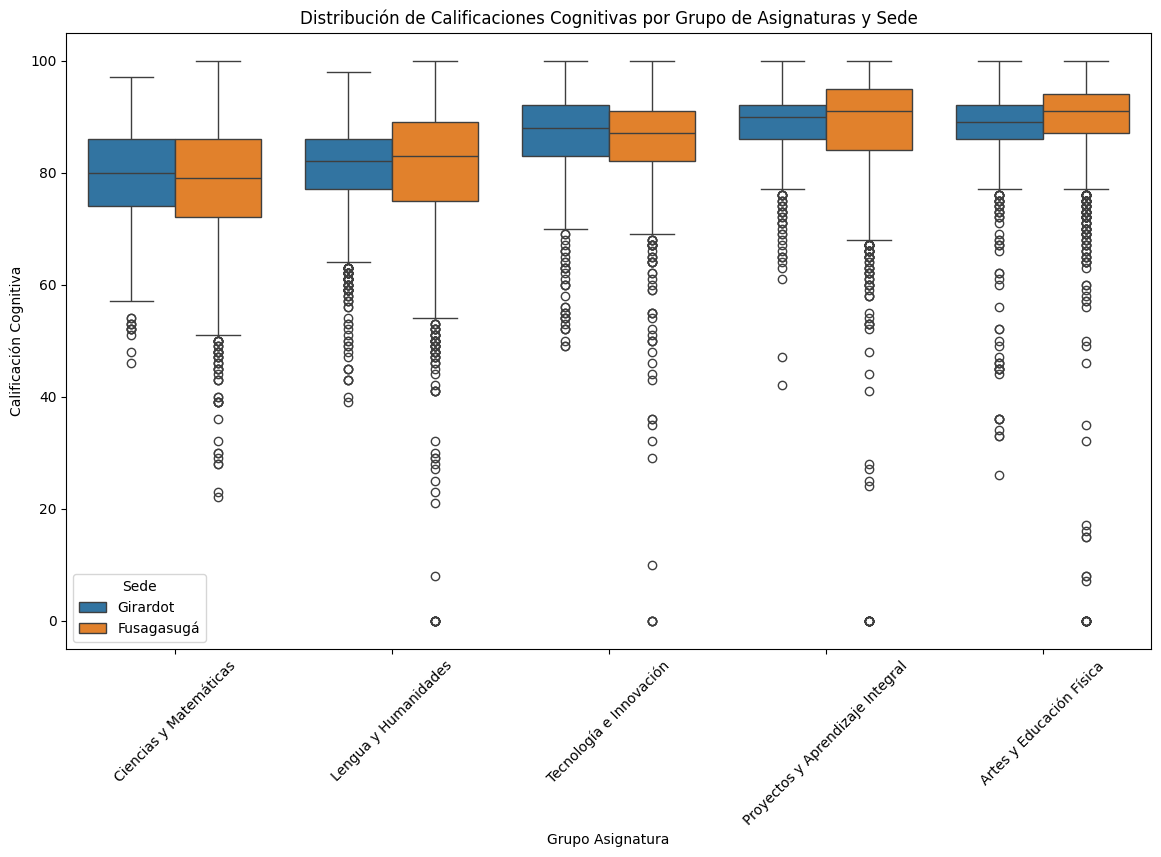

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico combinado para Fusagasugá y Girardot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Grupo Asignatura', y='Cognitiva', hue='Sede', data=calificaciones_df_trans)
plt.title('Distribución de Calificaciones Cognitivas por Grupo de Asignaturas y Sede')
plt.xlabel('Grupo Asignatura')
plt.ylabel('Calificación Cognitiva')
plt.xticks(rotation=45)
plt.legend(title='Sede')
plt.show()

En general, no hay diferencias drásticas entre las sedes, lo que sugiere que ambas están ofreciendo un nivel de enseñanza relativamente consistente en todas las áreas.

En el grupo de asignaturas **Ciencias y Matemáticas** se muestra una distribución de calificaciones bastante compacta, pero con algunos valores atípicos en la parte inferior, lo que sugiere que, aunque la mayoría de los estudiantes tienen un rendimiento similar, hay algunos que están luchando significativamente.



## Pre procesamiento


##### 1. Variables Objetivo y Características 
- **Variables objetivo (target)**: predecir el rendimiento por grado por materia,  usando cada una de las calificaciones (Cognitiva, Procedimental, Actitudinal, Axiologica) como variable objetivo.
- **Características (features)**: Las demás columnas se utilizarán como características para predecir la variable objetivo.

##### 2. Tipos de Variables finales: 
- **Variables categóricas**: Sede, Documento de identidad, Grado, Grupo, Periodo, Año, Asignatura, Grupo Asignatura.
- **Variables numéricas**: Intensidad Horaria, Cognitiva, Procedimental, Actitudinal, Axiologica, Calificacion_Ponderada.

In [295]:
calificaciones_df_trans.head()


,Sede,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada,Grupo Asignatura
16,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Ciencias Naturales,75,75,80,85.0,77.0,Ciencias y Matemáticas
17,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,4.0,Ciencias Sociales,86,88,93,92.0,88.6,Lengua y Humanidades
18,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,6.0,Matemáticas,87,89,85,90.0,87.5,Ciencias y Matemáticas
19,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,3.0,Lengua Castellana,79,87,90,90.0,84.7,Lengua y Humanidades
20,Girardot,4f157175b3867ef473521e99853ff65cf05dcdb26d2380...,6,A,IV,2023,4.0,Inglés,94,94,92,93.0,93.5,Lengua y Humanidades


In [296]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22045 entries, 16 to 24943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    22045 non-null  object 
 1   Documento de identidad  22045 non-null  object 
 2   Grado                   22045 non-null  int64  
 3   Grupo                   22045 non-null  object 
 4   Periodo                 22045 non-null  object 
 5   Año                     22045 non-null  object 
 6   Intensidad Horaria      22045 non-null  float64
 7   Asignatura              22045 non-null  object 
 8   Cognitiva               22045 non-null  int64  
 9   Procedimental           22045 non-null  int64  
 10  Actitudinal             22045 non-null  int64  
 11  Axiologica              22045 non-null  float64
 12  Calificacion_Ponderada  22045 non-null  float64
 13  Grupo Asignatura        22045 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory 

In [297]:
calificaciones_df_trans.describe()

,Grado,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica,Calificacion_Ponderada
count,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000,22045.000000
mean,5.051985,2.750782,84.070991,83.861420,88.432524,90.251440,85.498471
std,2.696113,1.515312,10.386572,10.730017,9.790634,8.966037,9.109598
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,79.000000,79.000000,85.000000,88.000000,81.500000
50%,5.000000,3.000000,86.000000,86.000000,90.000000,90.000000,87.100000
75%,7.000000,4.000000,91.000000,91.000000,95.000000,95.000000,91.400000
max,11.000000,7.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [298]:
calificaciones_df_trans.describe(include='object')

,Sede,Documento de identidad,Grupo,Periodo,Año,Asignatura,Grupo Asignatura
count,22045,22045,22045,22045,22045,22045,22045
unique,2,401,2,4,2,26,5
top,Fusagasugá,9d47656d2b3f47c3879d6a4eb41f504e2b4ef5c2e091a9...,A,I,2023,Educación Física,Lengua y Humanidades
freq,14369,82,21157,7405,14631,1835,7505


In [292]:

calificaciones_df_trans.to_csv('calificaciones_to_model_final.csv', index=False)